## Very Brief Model Evaluation

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [4]:
# Load Model
model = keras.models.load_model('model.h5')

In [5]:
# Load Test Dataset
x_test = np.load('x_test_transformed.npy')
y_test = np.load('y_test_transformed.npy')

In [6]:
# Predict with Model
y_pred = model.predict(x_test)

## Metrics

In [7]:
global_metrics = model.evaluate(x_test, y_test)

24/24 [==============================] - 1s 13ms/step - loss: 0.0778 - tp: 38164.0000 - fp: 5500.0000 - tn: 132131.0000 - fn: 16205.0000 - accuracy: 0.8771 - precision: 0.8740 - recall: 0.7019 - auc: 0.9251


In [25]:
# Generate Metrics for Each entry in the test dataset
metrics = np.asarray([model.evaluate(np.expand_dims(x, axis=0), np.expand_dims(y, axis=0)) for x, y in zip(x_test, y_test)])

1/1 [==============================] - 0s 21ms/step - loss: 0.0063 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 256.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0000e+00


1/1 [==============================] - 0s 27ms/step - loss: 0.4631 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 9.0000 - fn: 247.0000 - accuracy: 0.0352 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.1754


1/1 [==============================] - 0s 20ms/step - loss: 0.0017 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 256.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0000e+00


1/1 [==============================] - 0s 19ms/step - loss: 0.0251 - tp: 82.0000 - fp: 1.0000 - tn: 171.0000 - fn: 2.0000 - accuracy: 0.9492 - precision: 0.9880 - recall: 0.9762 - auc: 0.9992


1/1 [==============================] - 0s 19ms/step - loss: 0.2476 - tp: 1.0000 - fp: 0.0000e+00 - tn: 100.0000 - fn: 155.0000 - accuracy: 0.3945 - precision: 1.0000 - recall: 0.0064 - auc: 0.8719


1/1 [==============================] - 0s 21ms/step - loss: 0.1340 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 222.0000 - fn: 34.0000 - accuracy: 0.8672 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6400


1/1 [==============================] - 0s 20ms/step - loss: 0.0044 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 256.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0000e+00


1/1 [==============================] - 0s 19ms/step - loss: 0.2130 - tp: 0.0000e+00 - fp: 90.0000 - tn: 166.0000 - fn: 0.0000e+00 - accuracy: 0.6484 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0000e+00


1/1 [==============================] - 0s 20ms/step - loss: 0.0026 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 256.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0000e+00


1/1 [==============================] - 0s 20ms/step - loss: 0.0488 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 256.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0000e+00


In [47]:
# Order the Metrics by loss
ordered_metrics = metrics[metrics[:, 0].argsort(), :]

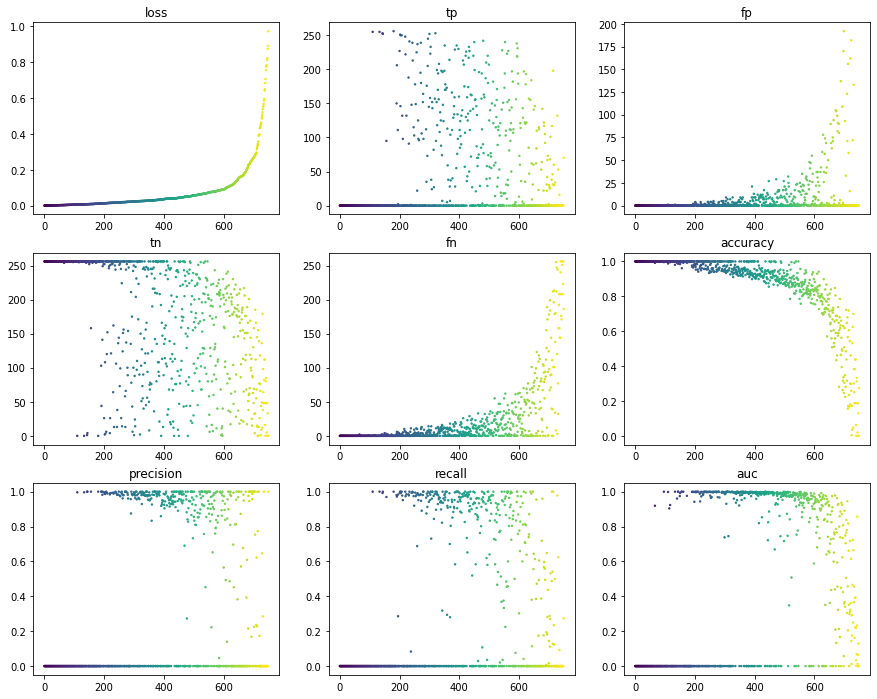

In [71]:
# Plot all metrics. The color is by the loss used in training which was binary focal crossentropy
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
for i, name in enumerate([met.name for met in model.metrics]):
    ax = axes.flat[i]
    ax.scatter(range(0, len(ordered_metrics)), ordered_metrics[:, i], s=2, c=range(0, len(ordered_metrics)))
    ax.set_title(name)

## Visualisation

In [118]:
def plotting(x, y_true, y_pred, metrics, idx, save=False):
    fig, axes = plt.subplots(2, 3, figsize=(14, 7))
    im = axes[0, 0].imshow(x[idx, :, :, 0], cmap='gray')
    plt.colorbar(im, ax=axes[0, 0])
    im = axes[0, 1].imshow(x[idx, :, :, 1], cmap='bwr')
    plt.colorbar(im, ax=axes[0, 1])
    im = axes[0, 2].imshow(x[idx, :, :, 2], cmap='bwr')
    plt.colorbar(im, ax=axes[0, 2])
    im = axes[1, 0].imshow(x[idx, :, :, 3], cmap='bwr')
    plt.colorbar(im, ax=axes[1, 0])
    im = axes[1, 1].imshow(y_true[idx, :, :, 0], cmap='bwr')
    plt.colorbar(im, ax=axes[1, 1])
    im = axes[1, 2].imshow(y_pred[idx, :, :, 0], cmap='bwr')
    plt.colorbar(im, ax=axes[1, 2])
    for ax, title in zip(axes.flat, ['Seismic', 'Energy', 'Semblance', 'Edge Detection', 'True Model', 'Predicted Model']):
        ax.set_title(title)
        
    fig.suptitle(f'Index:{idx}: Loss:{metrics[idx, 0]:.3f}, Accuracy: {metrics[idx, 5]:.3f}')
    if save:
        fig.savefig(f'Figures/Prediction_Example_idx{idx}')

In [80]:
loss_idx = metrics[:, 0].argsort()

#### Plot several examples, starting from lowest Loss to Highest Loss

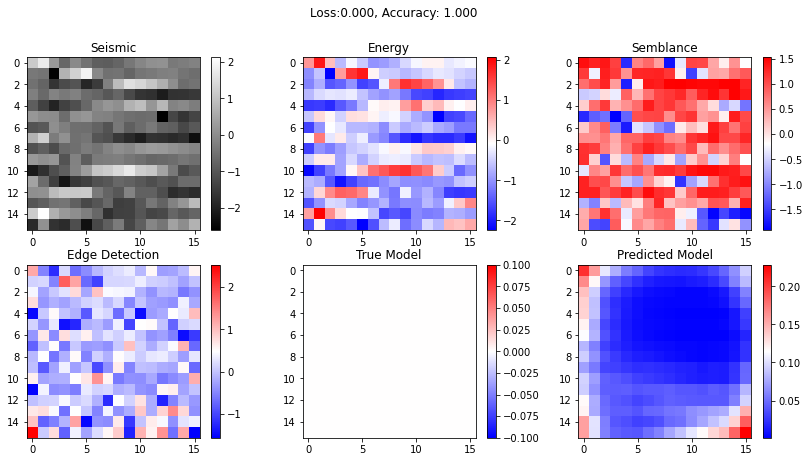

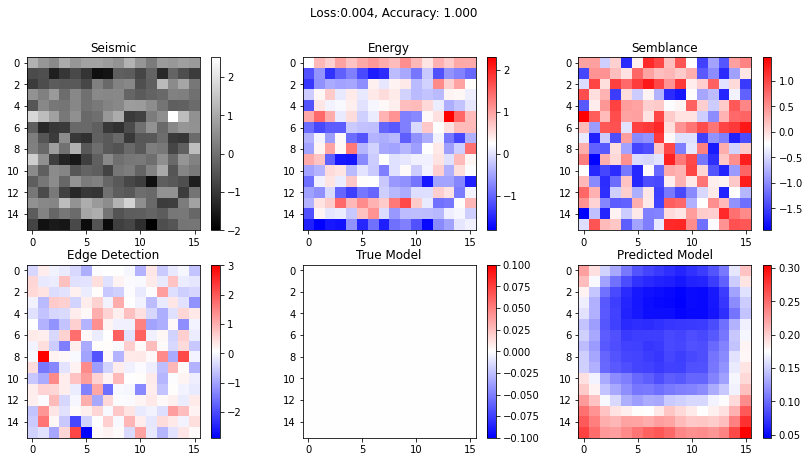

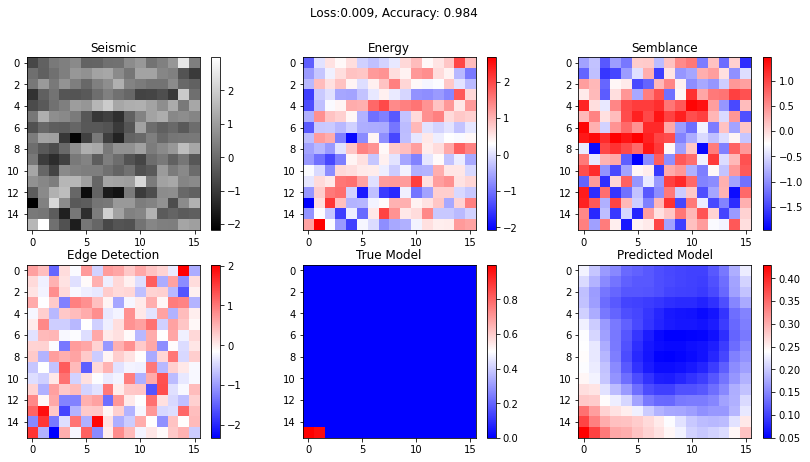

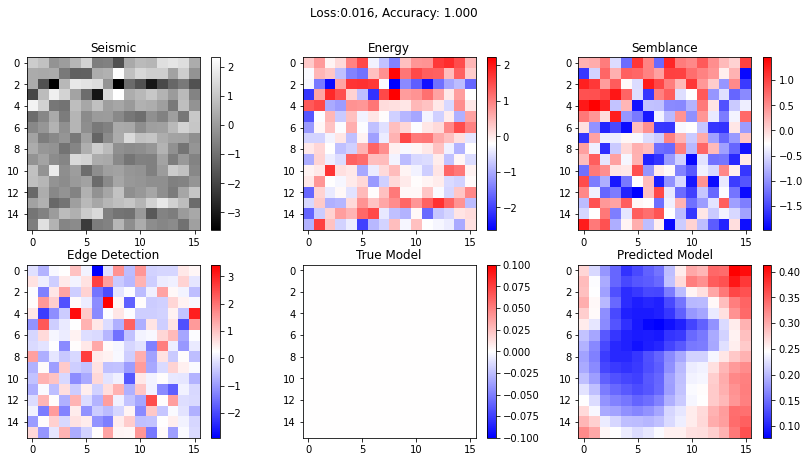

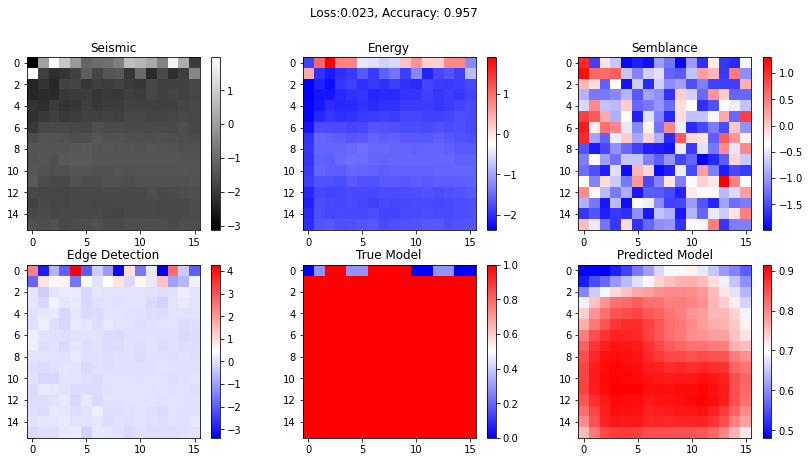

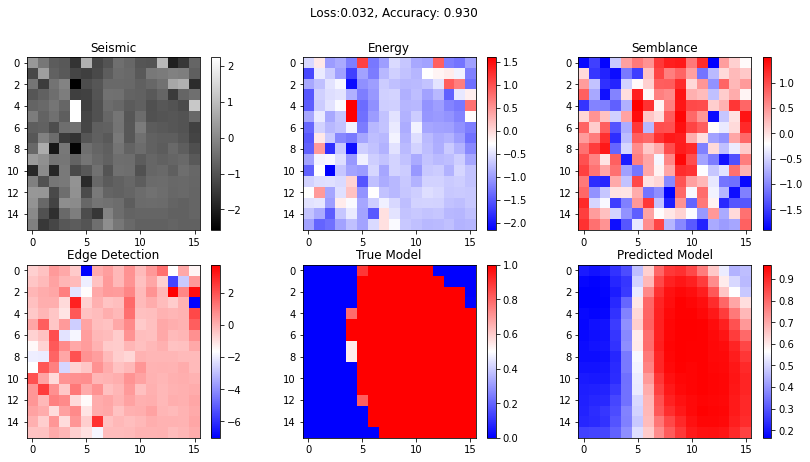

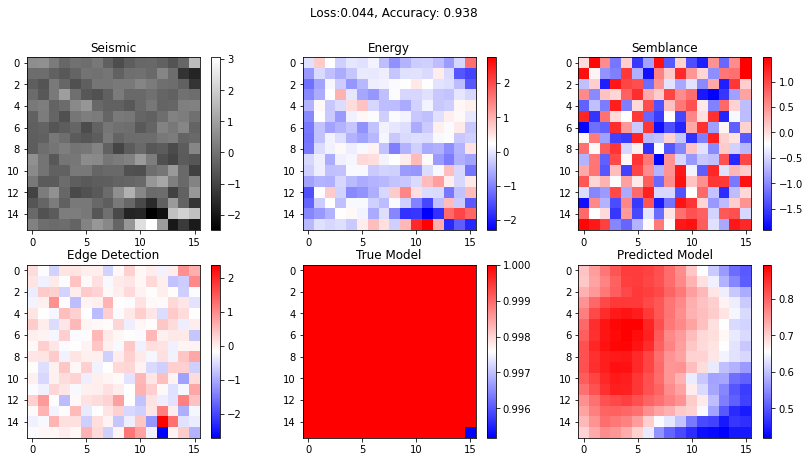

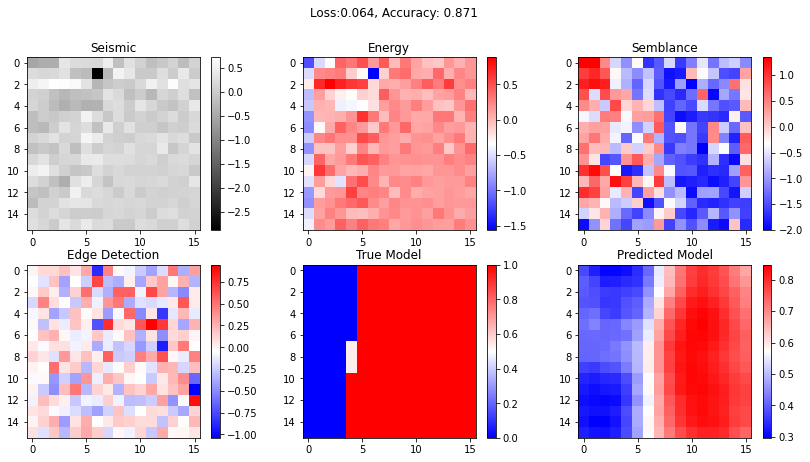

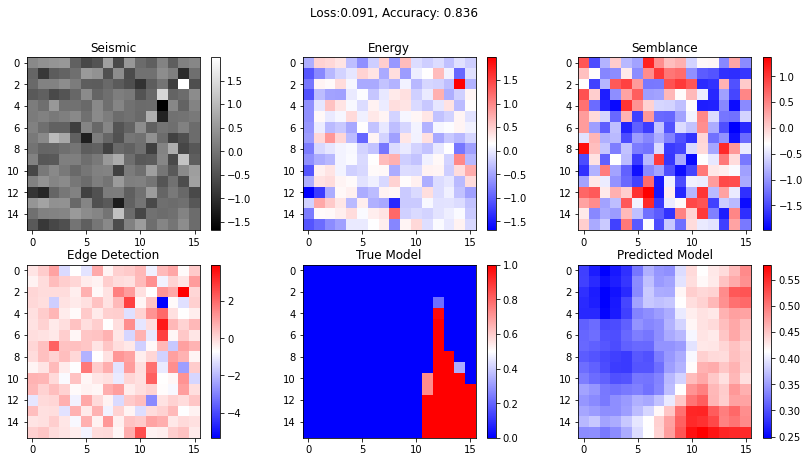

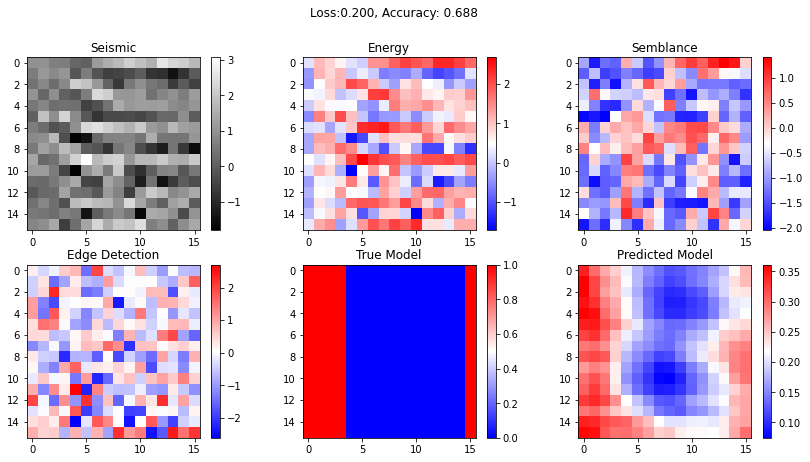

In [88]:
for idx in range(0, len(loss_idx), 75):
    plotting(x_test, y_test, y_pred, metrics, loss_idx[idx])

## Choosing Interesting Examples

In [94]:
loss_idx_no_zeros = loss_idx[300:]

In [103]:
loss_idx_no_zeros[::50]

array([517, 127, 309, 181, 124, 313, 259, 682, 616], dtype=int64)

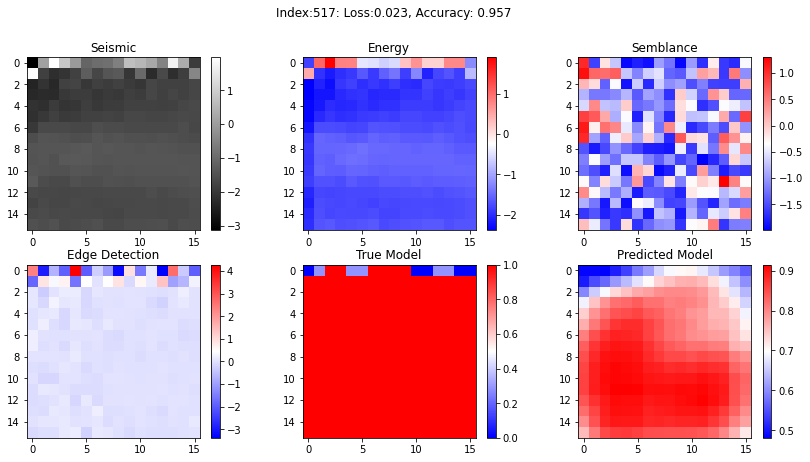

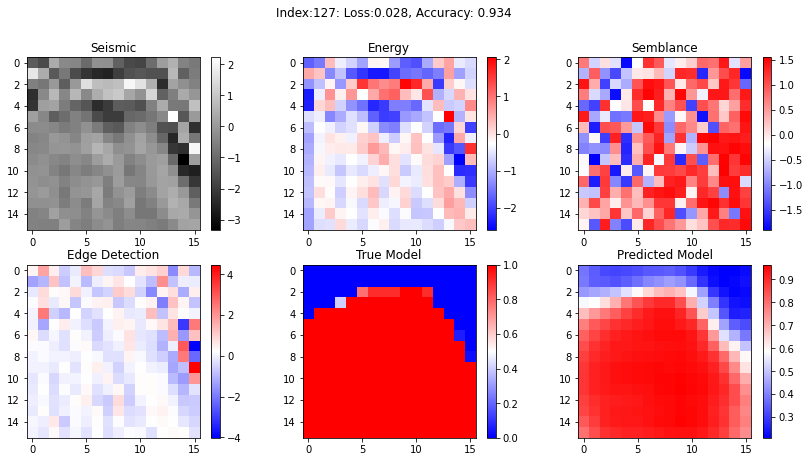

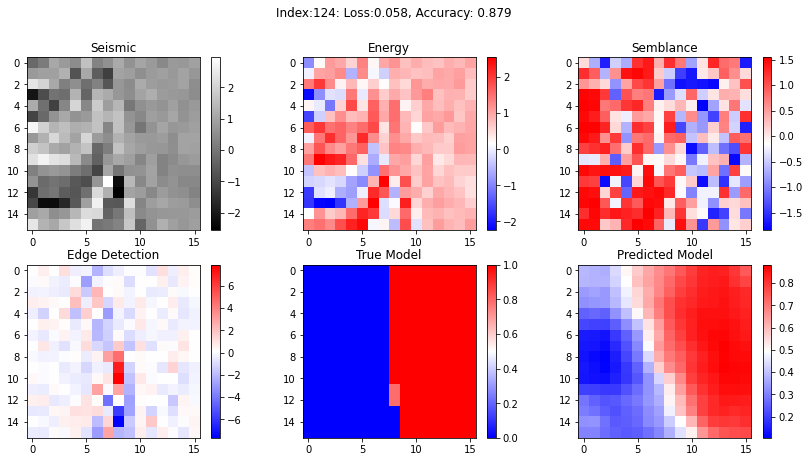

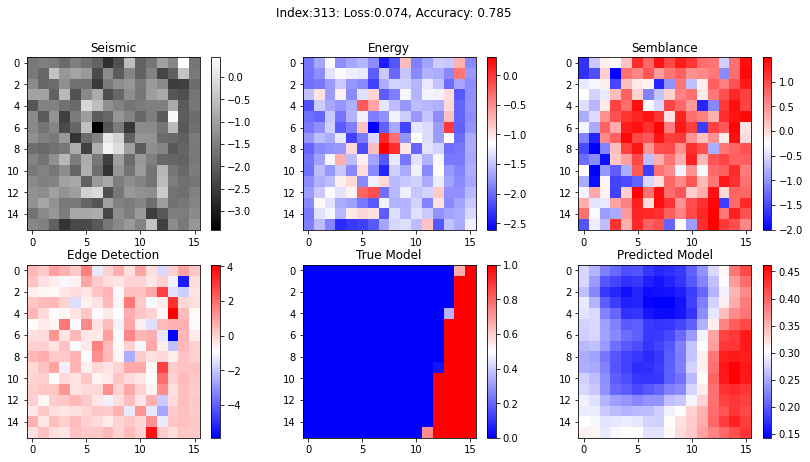

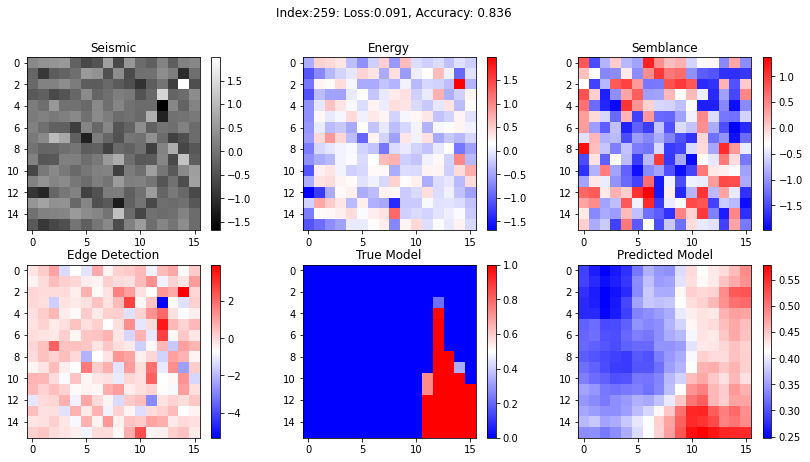

In [119]:
plotting(x_test, y_test, y_pred, metrics, 517, save=True)
plotting(x_test, y_test, y_pred, metrics, 127, save=True)
plotting(x_test, y_test, y_pred, metrics, 124, save=True)
plotting(x_test, y_test, y_pred, metrics, 313, save=True)
plotting(x_test, y_test, y_pred, metrics, 259, save=True)